In [2]:
import numpy as np
import os
import pandas as pd
import plotnine as pn

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
main_path = '/Users/kurtsmith/research/multiagent-rl/data/testing/constantbot/'
ddpg_path = main_path + 'ddpg/'
rdpg_path = main_path + 'rdpg/'
ddpg_runs = os.listdir(ddpg_path)
rdpg_runs = os.listdir(rdpg_path)
ddpg_runs = [f'{ddpg_path}{run}/' for run in ddpg_runs]
rdpg_runs = [f'{rdpg_path}{run}/' for run in rdpg_runs]

In [5]:
def get_runs(subdir, main_path=main_path, exp_name=None):
    path = main_path + subdir + '/'
    runs = os.listdir(path)
    runs = [f'{path}{run}/' for run in runs]
    if exp_name:
        exp_runs = []
        for r in runs:
            in_exp = False
            c = open(f'{r}config.json', "r")
            for line in c:
                if re.search(f'"{exp_name}",', line):
                    in_exp = True
            if in_exp: 
                exp_runs.append(r)
            runs = exp_runs
    prog = {x: pd.read_table(f'{x}progress.txt') for x in runs}
    for i, r in enumerate(prog):
        prog[r]['run'] = f'run_{i}'
    prog = pd.concat(prog.values())
    return prog, runs

In [6]:
import re

exp_name = "polya_0_900"
conf = "/Users/kurtsmith/research/multiagent-rl/data/testing/constantbot/ddpg_orig/1610835051/config.json"
conf = open(conf, "r")
for line in conf:
    if re.search(f'"{exp_name}",', line):
        print(line)

    "exp_name":	"polya_0_900",

            "exp_name":	"polya_0_900",

        "exp_name":	"polya_0_900",



In [7]:
ddpg, ddpg_runs = get_runs('ddpg', exp_name = 'q_32x4')
ddpg_noise_5, _ = get_runs('ddpg', exp_name = 'q_32x4_noise_0_5')
ddpg_noise_02, _ = get_runs('ddpg', exp_name = 'q_32x4_noise_0_02')

In [8]:
ddpg_orig, ddpg_orig_runs = get_runs('ddpg_orig', exp_name = 'q_32x4')
rdpg, rdpg_runs = get_runs('rdpg')
ddpg_polya, _ = get_runs('ddpg_orig', exp_name = 'polya_0_900')
ddpg_gamma, _ = get_runs('ddpg_orig', exp_name = 'gamma_0_00')
td3_orig, _ = get_runs('td3_orig', exp_name = 'q_32x4')
td3_gamma, _ = get_runs('td3_orig', exp_name = 'gamma_0_00')

In [9]:
td3_nonflat, _ = get_runs('td3', exp_name = 'nonflat_reward')

EmptyDataError: No columns to parse from file

In [217]:
sac, _ = get_runs('sac_orig', exp_name = 'q_32x2')

In [318]:
sac_decr_98, _ = get_runs('sac_orig', exp_name = 'decreasing_alpha_98')
sac_decr_94, _ = get_runs('sac_orig', exp_name = 'decreasing_alpha_94')
sac_decr_90, _ = get_runs('sac_orig', exp_name = 'decreasing_alpha_90')
sac_decr_50, _ = get_runs('sac_orig', exp_name = 'decreasing_alpha_50')
sac_auto, _ = get_runs('sac_orig', exp_name = 'auto_alpha')
sac_orig_auto_t4, _ = get_runs('sac_orig', exp_name = 'new_auto_alpha_targ_4')
sac_done_auto_t4, _ = get_runs('sac_orig', exp_name = 'done_auto_alpha_targ_4')
sac_orig_auto_t8, _ = get_runs('sac_orig', exp_name = 'auto_alpha_targ_8')



In [463]:
sac, _ = get_runs('sac', exp_name = 'first_sac_test')
sac_auto_t4, _ = get_runs('sac', exp_name = 'auto_alpha_targ_4')
sac_done_t4, _ = get_runs('sac', exp_name = 'done_alpha_targ_4')
sac_auto_t8, _ = get_runs('sac', exp_name = 'auto_alpha_targ_8')

# Try tuning alpha/entr targ/LR with gamma=0.
# Should be solvable!
sac_gamma_0, _ = get_runs('sac', exp_name = 'gamma_0_alpha_05_targ_4')
sac_gamma_50, _ = get_runs('sac', exp_name = 'gamma_50_alpha_05_targ_4')
sac_gamma_90, _ = get_runs('sac', exp_name = 'gamma_90_alpha_05_targ_4')
sac_gamma_99, _ = get_runs('sac', exp_name = 'gamma_99_alpha_05_targ_4')
sac_gamma_99_a_20, _ = get_runs('sac', exp_name = 'gamma_99_alpha_20_targ_4')
sac_gamma_99_a_20_t1, _ = get_runs('sac', exp_name = 'gamma_99_alpha_20_targ_1')
sac_gamma_99_done, _ = get_runs('sac', exp_name = 'gamma_99_done')
sac_gamma_99_done2, _ = get_runs('sac', exp_name = 'gamma_99_done_loss')
sac_random_10, _ = get_runs('sac', exp_name = 'random_d')
sac_random_01, _ = get_runs('sac', exp_name = 'random_01')
sac_random_001, _ = get_runs('sac', exp_name = 'random_001')
sac_permute, _ = get_runs('sac', exp_name = 'permute_d')
sac_zeros, _ = get_runs('sac', exp_name = 'zeros_like')
sac_random_01_lr_01, _ = get_runs('sac', exp_name = 'random_01_lr_01')
sac_random_01_lr2_01, _ = get_runs('sac', exp_name = 'random_01_lr2_01')
sac_nonflat, nfr = get_runs('sac', exp_name = 'standard_nonflat')

In [464]:
sac_100, _ = get_runs('sac', exp_name = 'ep_len_100')

In [465]:
# var = 'AverageTestActOffer'
# var = 'AverageTestActDemand'
# var = 'LossPi'
var = 'AverageTestEpRet'
# var = 'AverageEpRet'

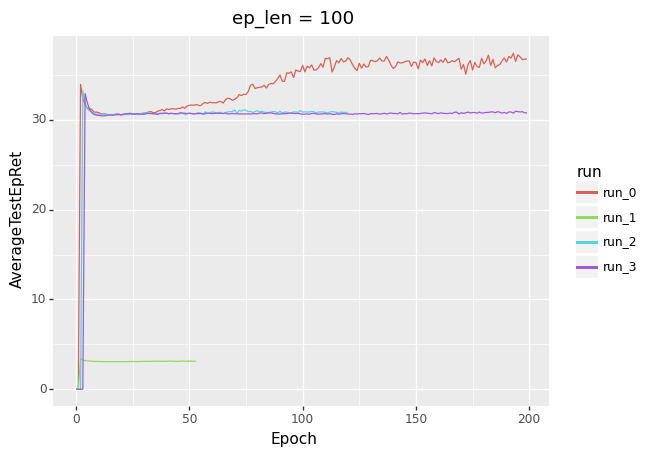

<ggplot: (8790607287535)>

In [466]:
display(pn.ggplot(sac_100, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='ep_len = 100'))

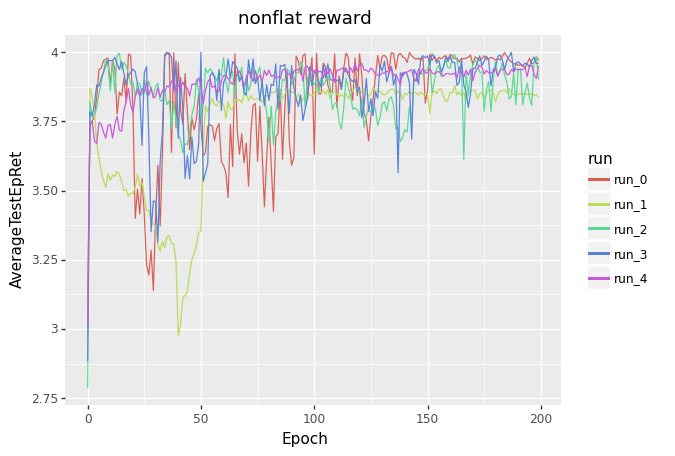

<ggplot: (-9223363246214104460)>

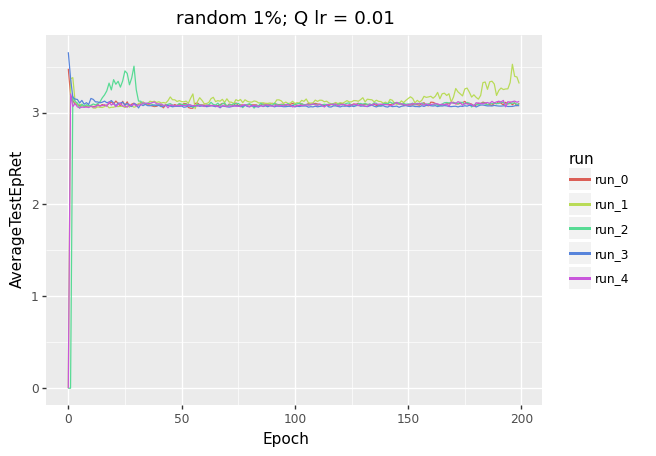

<ggplot: (8790691146458)>

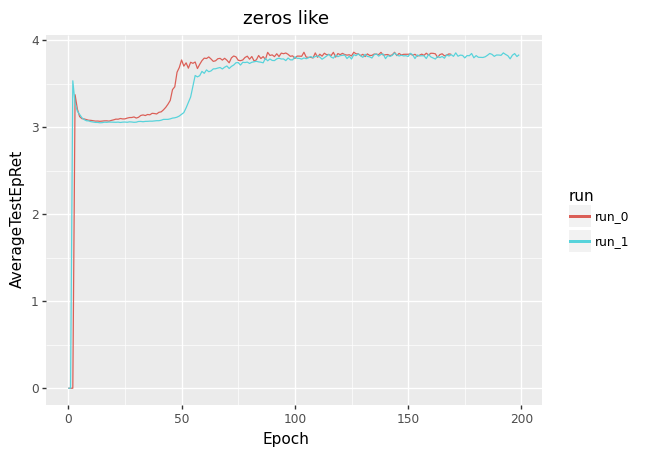

<ggplot: (8790708419311)>

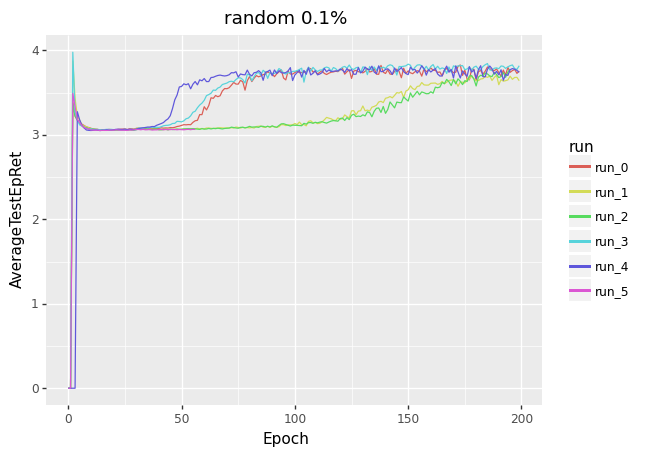

<ggplot: (8790708419311)>

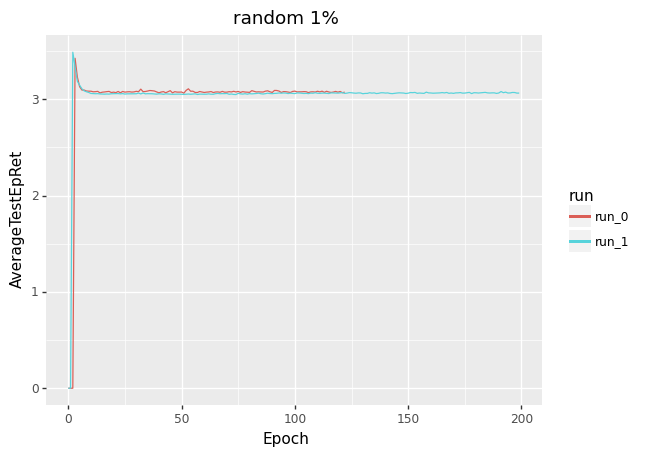

<ggplot: (8790489757062)>

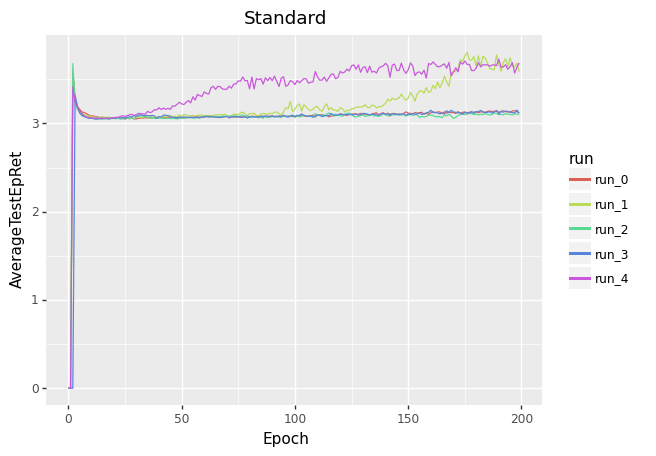

<ggplot: (8790573611570)>

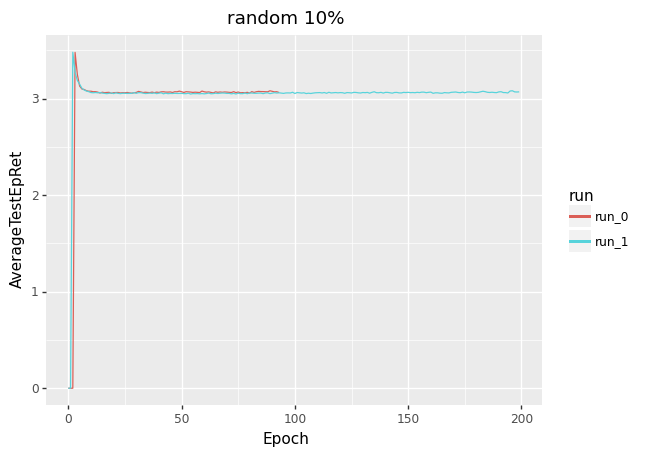

<ggplot: (-9223363246381879068)>

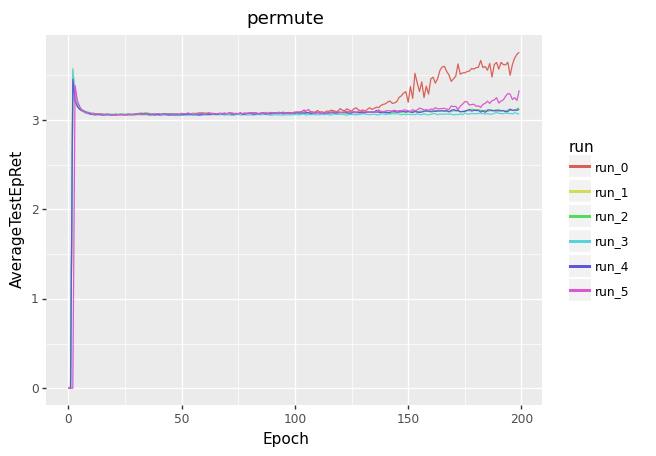

<ggplot: (8790708419311)>

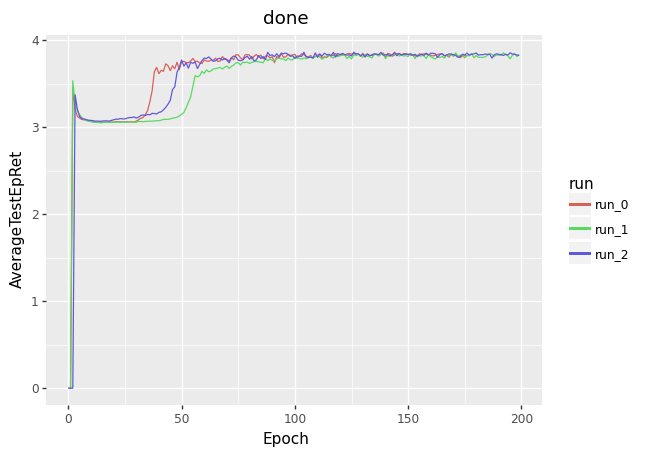

<ggplot: (8790691146416)>

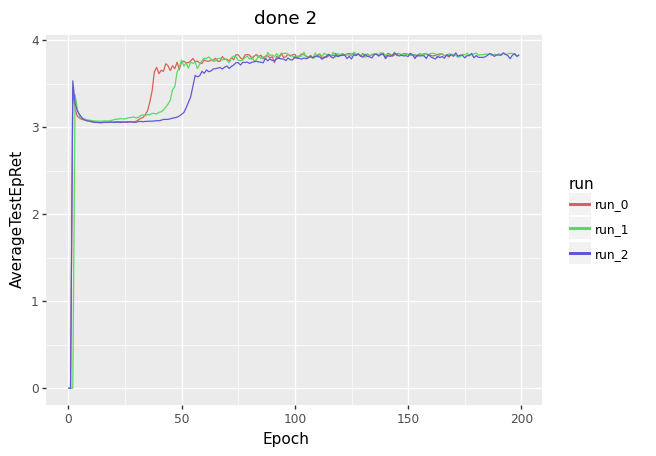

<ggplot: (8790489757062)>

In [467]:
display(pn.ggplot(sac_nonflat, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='nonflat reward'))
display(pn.ggplot(sac_random_01_lr2_01, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='random 1%; Q lr = 0.01'))
display(pn.ggplot(sac_zeros, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='zeros like'))
display(pn.ggplot(sac_random_001, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='random 0.1%'))
display(pn.ggplot(sac_random_01, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='random 1%'))
display(pn.ggplot(sac_gamma_99, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='Standard'))
display(pn.ggplot(sac_random_10, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='random 10%'))
display(pn.ggplot(sac_permute, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='permute'))
display(pn.ggplot(sac_gamma_99_done, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='done'))
display(pn.ggplot(sac_gamma_99_done2, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='done 2'))

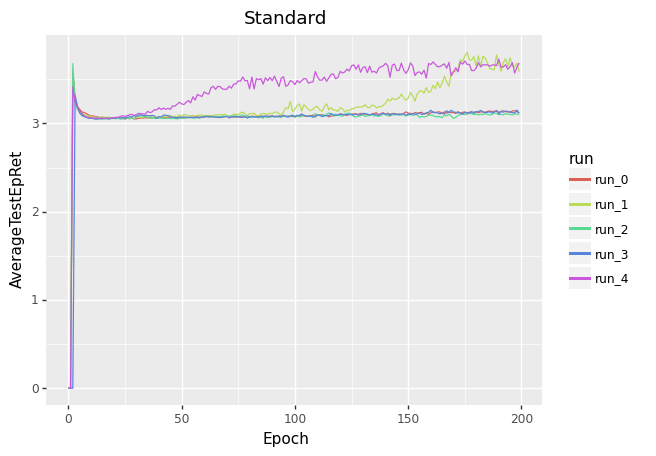

<ggplot: (-9223363246347903912)>

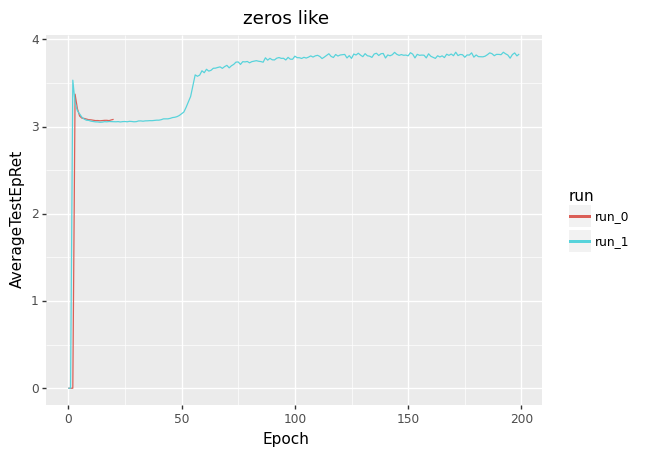

<ggplot: (8790506871991)>

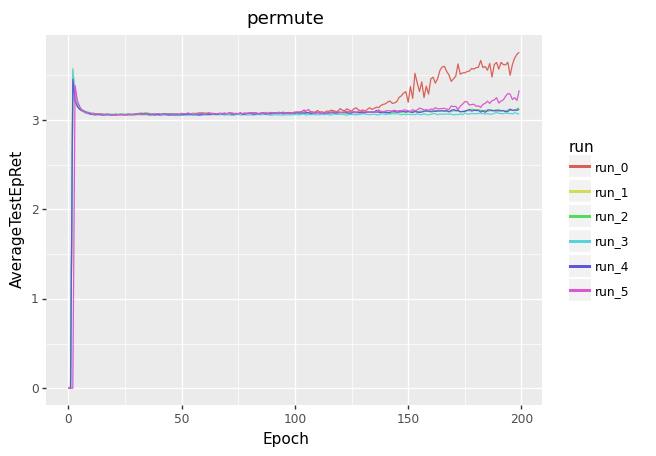

<ggplot: (8790506871893)>

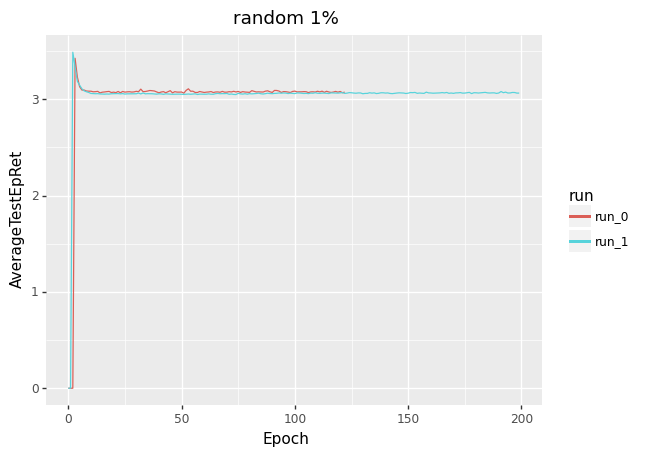

<ggplot: (-9223363246347903891)>

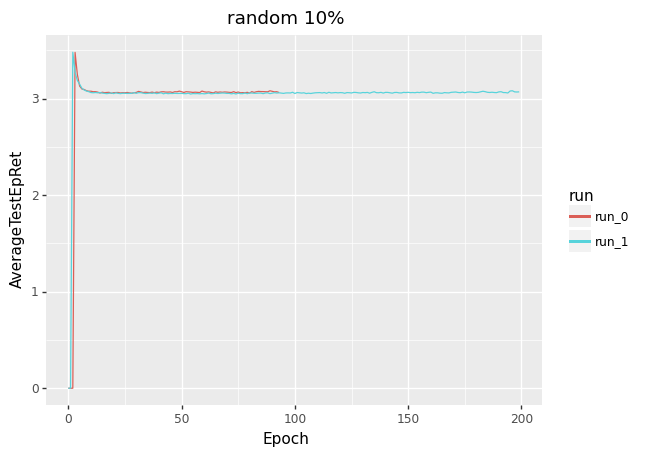

<ggplot: (-9223363246347903912)>

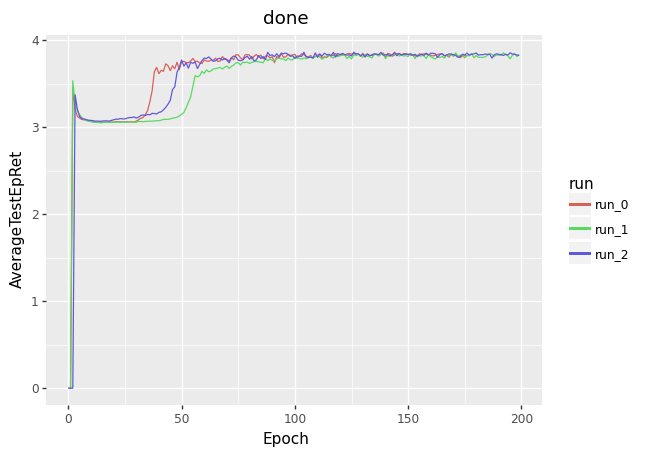

<ggplot: (-9223363246347903891)>

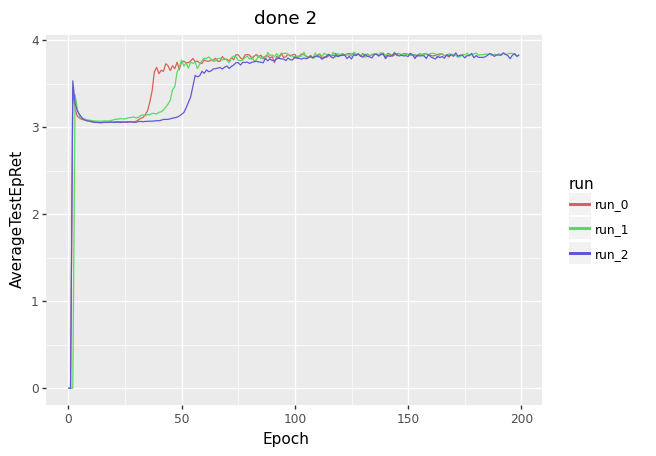

<ggplot: (-9223363246347903835)>

99 a 20


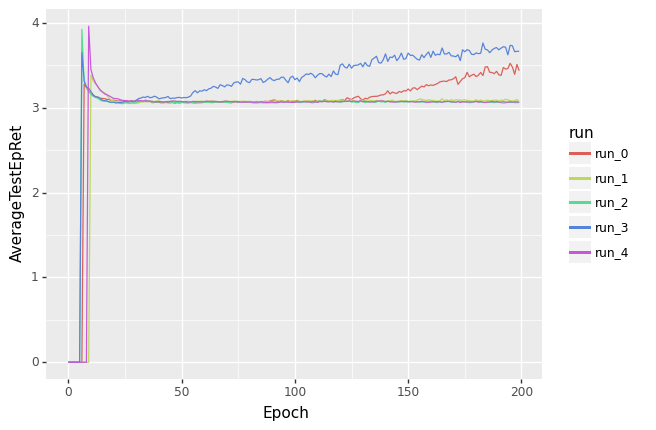

<ggplot: (-9223363246347903891)>

99 a 20 t1


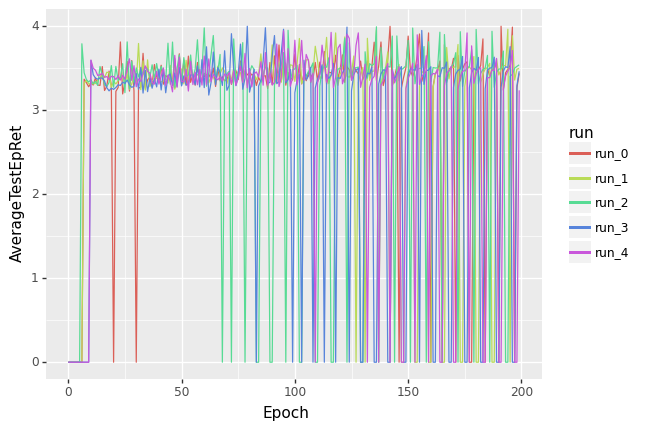

<ggplot: (-9223363246347903891)>

0


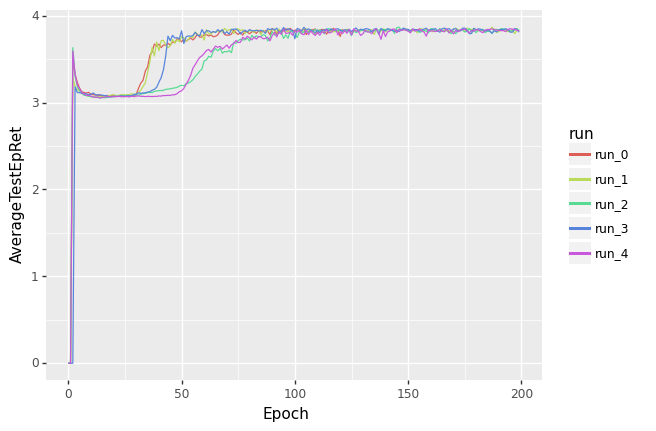

<ggplot: (-9223363246347903891)>

50


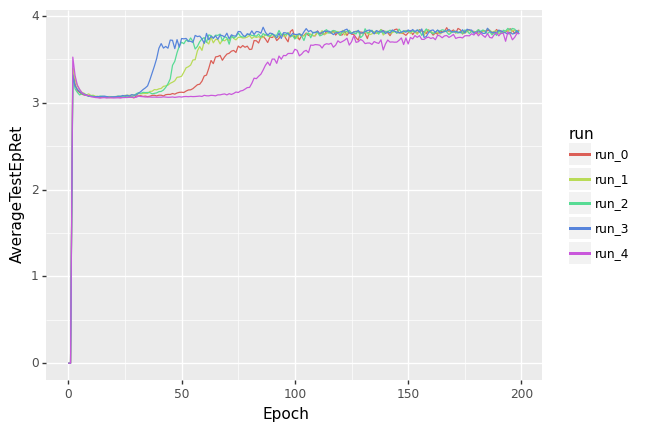

<ggplot: (-9223363246347903891)>

90


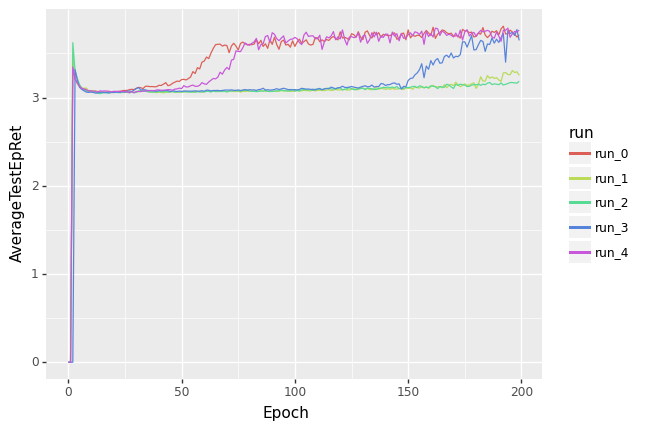

<ggplot: (8790557076670)>

In [365]:
print('99 a 20')
display(pn.ggplot(sac_gamma_99_a_20, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line() + pn.labs(title=''))
print('99 a 20 t1')
display(pn.ggplot(sac_gamma_99_a_20_t1, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line() + pn.labs(title=''))
print('0')
display(pn.ggplot(sac_gamma_0, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line() + pn.labs(title=''))
print('50')
display(pn.ggplot(sac_gamma_50, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line() + pn.labs(title=''))
print('90')
display(pn.ggplot(sac_gamma_90, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line() + pn.labs(title=''))

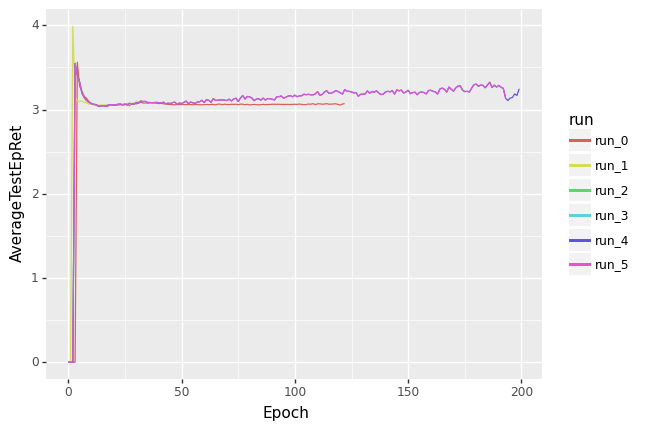

<ggplot: (-9223363246247649469)>

In [209]:
pn.ggplot(sac_auto_t4, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

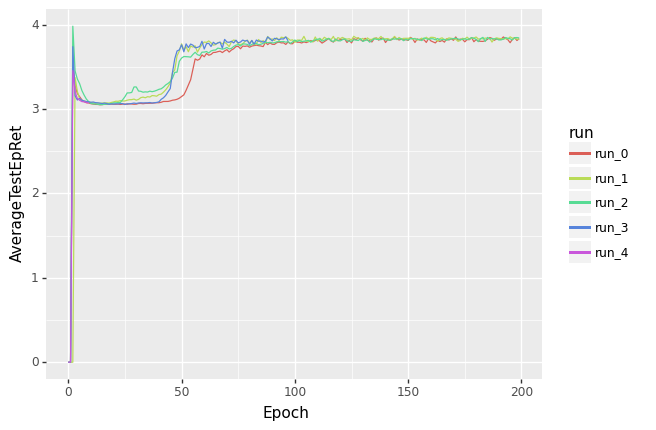

<ggplot: (-9223363246281150888)>

In [162]:
pn.ggplot(sac_done_t4, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

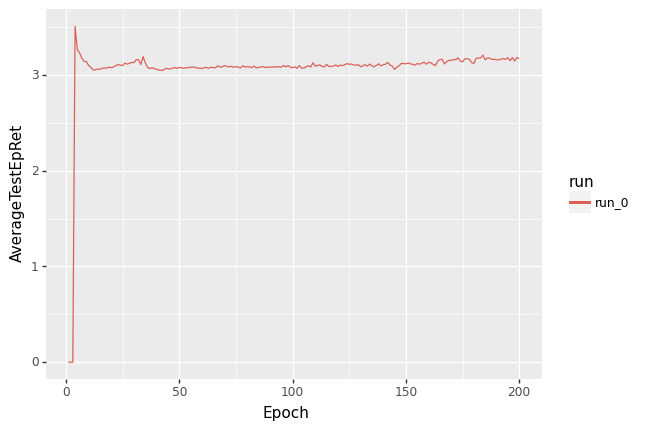

<ggplot: (8790607138361)>

In [119]:
pn.ggplot(sac_orig_auto_t4, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

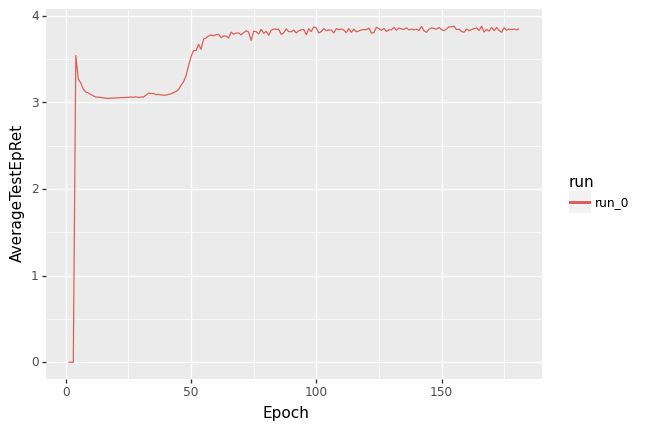

<ggplot: (-9223363246281183074)>

In [122]:
pn.ggplot(sac_done_auto_t4, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

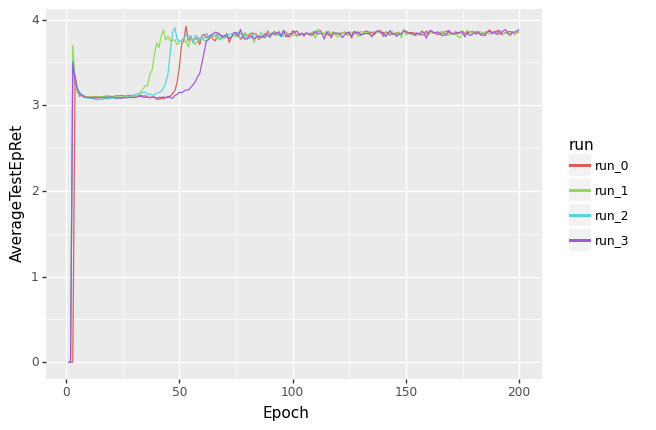

<ggplot: (-9223363246281177982)>

In [33]:
pn.ggplot(sac_orig_auto_t4, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

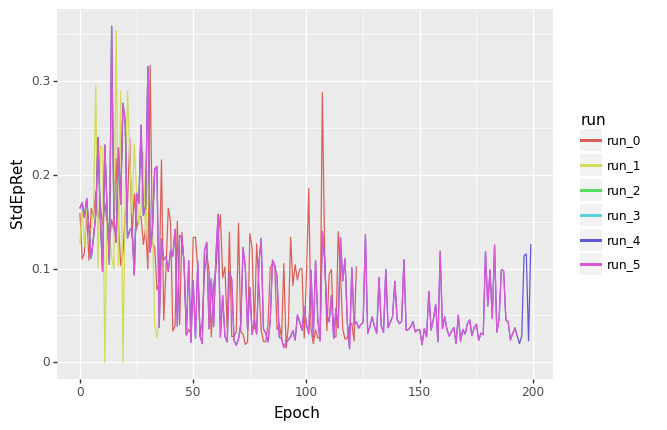

<ggplot: (8790640674957)>

In [96]:
pn.ggplot(sac_auto_t4, pn.aes(x='Epoch', y='StdEpRet', color='run')) + pn.geom_line()

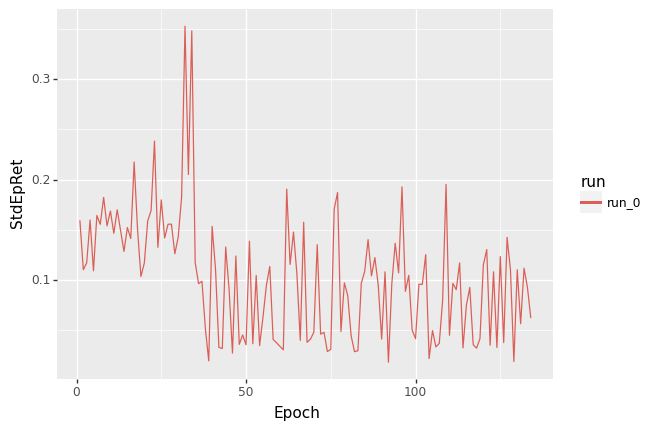

<ggplot: (-9223363246214100981)>

In [97]:
pn.ggplot(sac_orig_auto_t4, pn.aes(x='Epoch', y='StdEpRet', color='run')) + pn.geom_line()

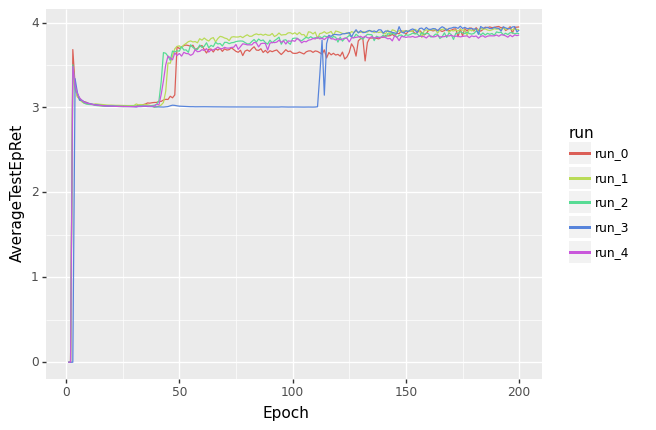

<ggplot: (-9223363246180283069)>

In [100]:
pn.ggplot(sac_orig_auto_t8, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(td3_nonflat, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(sac, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(sac_auto, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

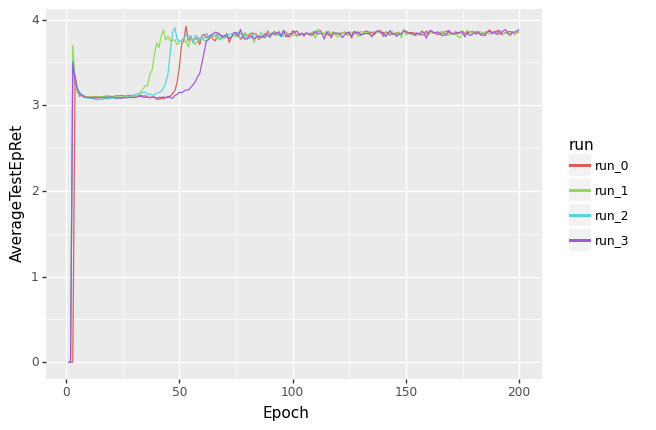

<ggplot: (8790657353655)>

In [14]:
pn.ggplot(sac_auto_t4, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(sac_auto_t8, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(sac_decr_98, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(sac_decr_94, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(sac_decr_90, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(sac_decr_50, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
display(sac[sac["Epoch"]==200])
display(sac_auto_t4[sac_auto_t4["Epoch"]==200])
display(sac_auto_t8[sac_auto_t8["Epoch"]==200])

display(sac_decr_98[sac_decr_98["Epoch"]==200])
display(sac_decr_94[sac_decr_94["Epoch"]==200])
display(sac_decr_90[sac_decr_90["Epoch"]==200])
display(sac_decr_50[sac_decr_50["Epoch"]==200])

In [ ]:
pn.ggplot(td3_orig, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(td3_gamma, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_orig, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_polya, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_gamma, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_gamma, pn.aes(x='Epoch', y='LossQ', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_gamma, pn.aes(x='Epoch', y='LossPi', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_gamma, pn.aes(x='Epoch', y='AverageQVals', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_noise_5, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_noise_02, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg, pn.aes(x='Epoch', y='LossQ', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg, pn.aes(x='Epoch', y='LossPi', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg, pn.aes(x='Epoch', y='AverageQVals', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg, pn.aes(x='Epoch', y='StdQVals', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(rdpg, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(rdpg, pn.aes(x='Epoch', y='AverageQVals', color='run')) + pn.geom_line()

In [1345]:
sac, nfr = get_runs('sac', exp_name = 'alpha_8')
sac_new, nfr_new = get_runs('sac', exp_name = 'alpha_8_new_buf')
rsac, nfrsac = get_runs('rsac', exp_name = 'standard')
rsac_sac, _ = get_runs('rsac', exp_name = 'standard_sac_agent')
rsac_q_sac, _ = get_runs('rsac', exp_name = 'rsac_w_sac_q')

In [1439]:
nonfixed, _ = get_runs('rsac', exp_name = 'nonfixed')
rsac_1, _ = get_runs('rsac', exp_name = 'rsac_1')

In [1437]:
def test_plots(df):
    display(pn.ggplot(df, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line())
    display(pn.ggplot(df, pn.aes(x='Epoch', y='StdTestEpRet', color='run')) + pn.geom_line())
    display(pn.ggplot(df, pn.aes(x='Epoch', y='AverageTestActOffer', color='run')) + pn.geom_line())
    display(pn.ggplot(df, pn.aes(x='Epoch', y='StdTestActOffer', color='run')) + pn.geom_line())
    display(pn.ggplot(df, pn.aes(x='Epoch', y='AverageTestActDemand', color='run')) + pn.geom_line())
    display(pn.ggplot(df, pn.aes(x='Epoch', y='StdTestActDemand', color='run')) + pn.geom_line())

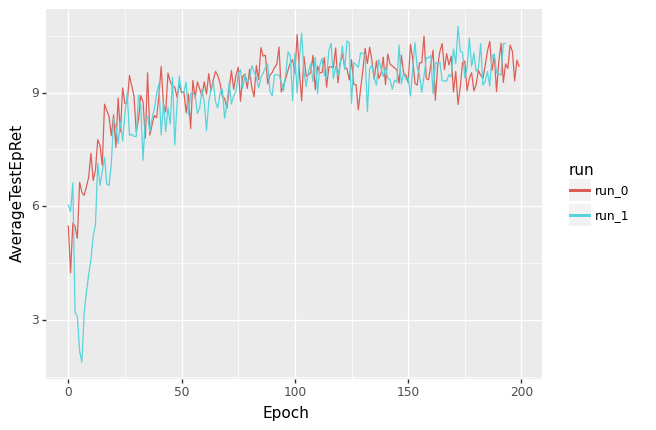

<ggplot: (8790641378978)>

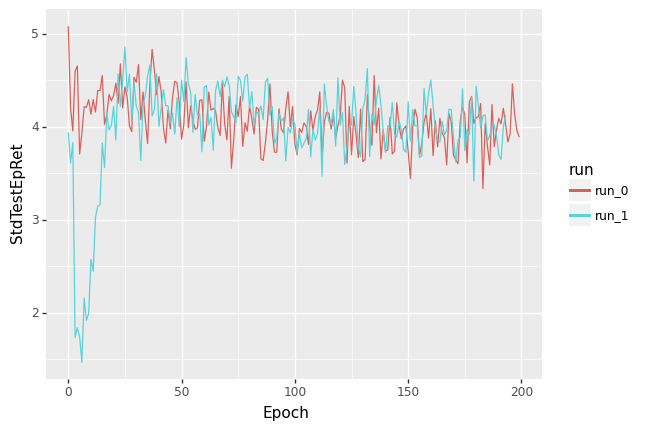

<ggplot: (8790506815699)>

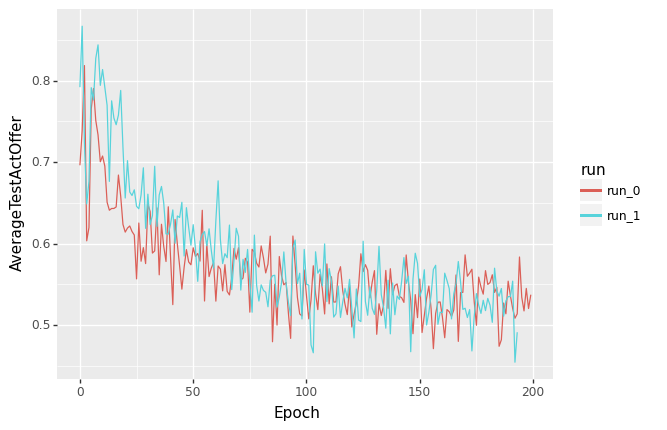

<ggplot: (-9223363246314369129)>

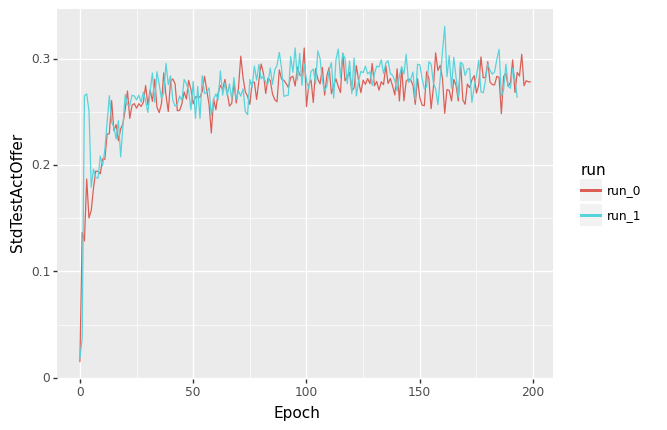

<ggplot: (8790524111003)>

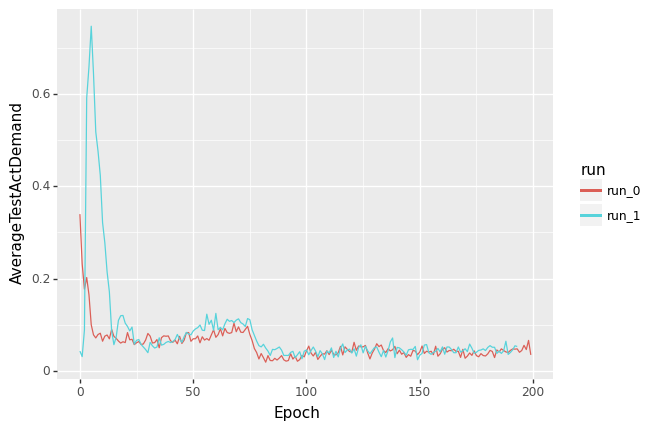

<ggplot: (-9223363246347955866)>

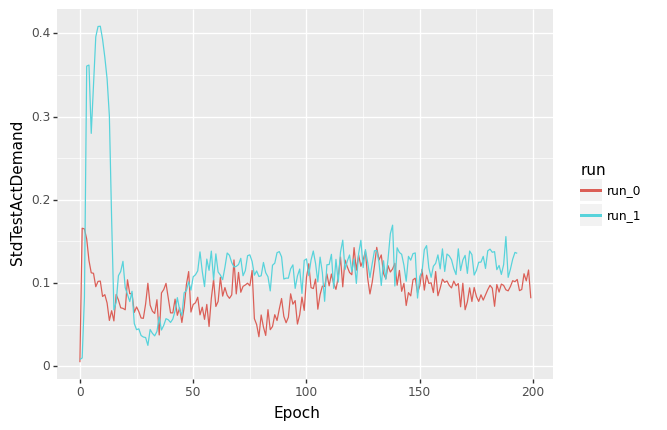

<ggplot: (8790674534527)>

In [1440]:
test_plots(nonfixed)

In [1425]:
q1_map = pd.read_csv("/Users/kurtsmith/research/multiagent-rl/data/q_maps/nonfixed_1_map.csv")
q2_map = pd.read_csv("/Users/kurtsmith/research/multiagent-rl/data/q_maps/nonfixed_2_map.csv")

# q1_map = q1_map.iloc[(101*101*32):]
# q2_map = q2_map.iloc[(101*101*32):]
q1_map.shape
step_vals = q1_map['step'].unique()
print(step_vals)

[4999 9999]


In [1426]:
cols = ['a_0', 'a_1', 'q', 'step']
merge_cols = ['a_0', 'a_1', 'step']
q_comb = pd.merge(q1_map[cols], q2_map[cols], on =merge_cols)
q_comb['q'] = q_comb[['q_x', 'q_y']].min(axis=1)
q_map = q_comb

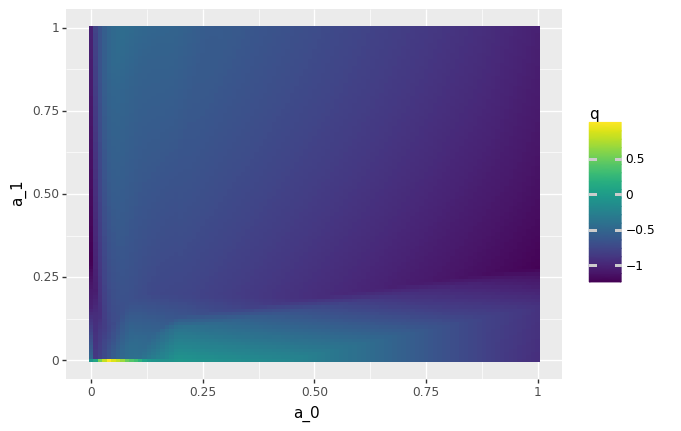

<ggplot: (-9223363246281137541)>

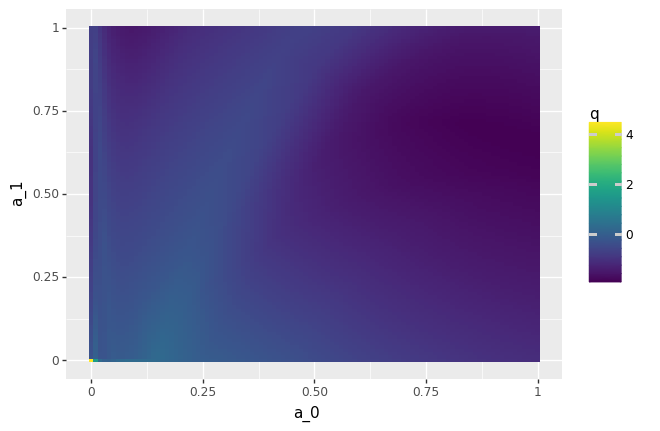

<ggplot: (8790573649570)>

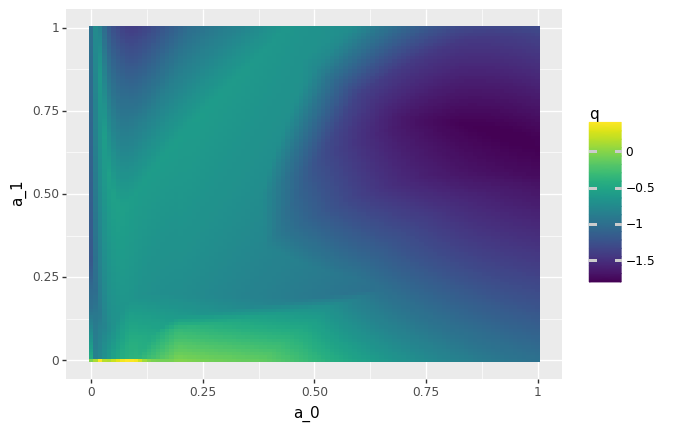

<ggplot: (-9223363246281137541)>

In [1427]:
step = step_vals[-1]
display(pn.ggplot(q1_map[q1_map['step']==step], pn.aes('a_0', 'a_1', fill='q')) + pn.geom_tile())
display(pn.ggplot(q2_map[q2_map['step']==step], pn.aes('a_0', 'a_1', fill='q')) + pn.geom_tile())
display(pn.ggplot(q_comb[q_comb['step']==step], pn.aes('a_0', 'a_1', fill='q')) + pn.geom_tile())

0.0


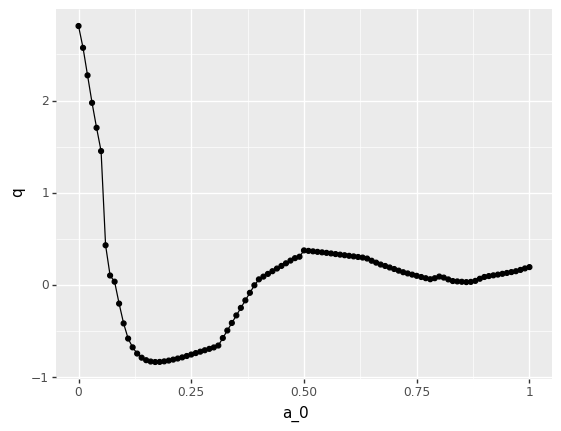

<ggplot: (-9223363246381778067)>

        a_0  a_1       q_x   step       q_y         q
71496  0.89  0.0  2.607851  39999  0.067971  0.067971
71497  0.90  0.0  2.595599  39999  0.087266  0.087266
71498  0.91  0.0  2.583212  39999  0.097014  0.097014
71499  0.92  0.0  2.570691  39999  0.104894  0.104894
71500  0.93  0.0  2.558037  39999  0.112906  0.112906
71501  0.94  0.0  2.545252  39999  0.121462  0.121462
71502  0.95  0.0  2.533356  39999  0.130743  0.130743
71503  0.96  0.0  2.521374  39999  0.140118  0.140118
71504  0.97  0.0  2.516704  39999  0.149578  0.149578
71505  0.98  0.0  2.514037  39999  0.163823  0.163823
71506  0.99  0.0  2.513577  39999  0.179976  0.179976
71507  1.00  0.0  2.512623  39999  0.194181  0.194181
0.1


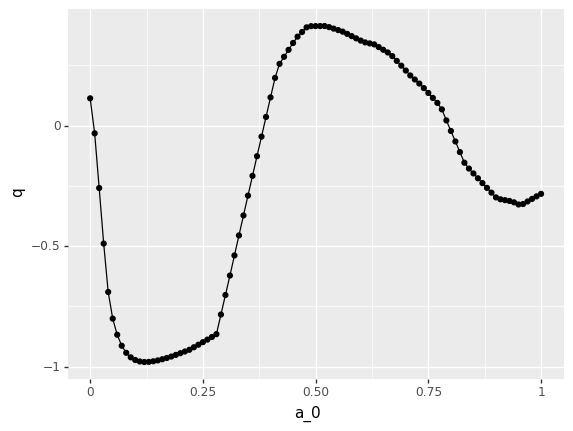

<ggplot: (-9223363246381779463)>

        a_0  a_1       q_x   step       q_y         q
72506  0.89  0.1  2.628921  39999 -0.278340 -0.278340
72507  0.90  0.1  2.619587  39999 -0.297986 -0.297986
72508  0.91  0.1  2.610096  39999 -0.305944 -0.305944
72509  0.92  0.1  2.600448  39999 -0.309454 -0.309454
72510  0.93  0.1  2.590638  39999 -0.312842 -0.312842
72511  0.94  0.1  2.580547  39999 -0.318520 -0.318520
72512  0.95  0.1  2.570302  39999 -0.327347 -0.327347
72513  0.96  0.1  2.559904  39999 -0.325566 -0.325566
72514  0.97  0.1  2.549355  39999 -0.314966 -0.314966
72515  0.98  0.1  2.538655  39999 -0.304198 -0.304198
72516  0.99  0.1  2.527806  39999 -0.293714 -0.293714
72517  1.00  0.1  2.516808  39999 -0.283378 -0.283378
0.2


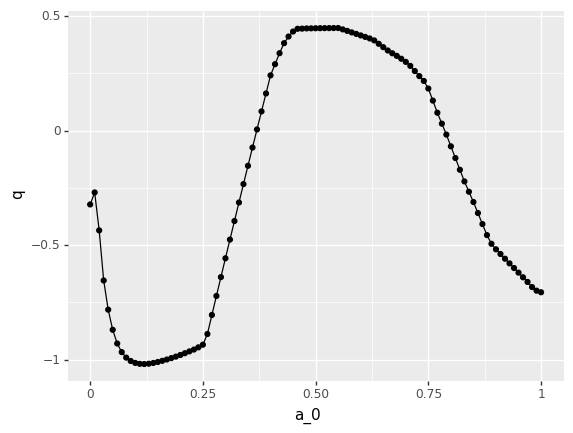

<ggplot: (8790540727637)>

        a_0  a_1       q_x   step       q_y         q
73516  0.89  0.2  2.684168  39999 -0.493937 -0.493937
73517  0.90  0.2  2.675068  39999 -0.518088 -0.518088
73518  0.91  0.2  2.665801  39999 -0.538649 -0.538649
73519  0.92  0.2  2.656368  39999 -0.559091 -0.559091
73520  0.93  0.2  2.646524  39999 -0.579414 -0.579414
73521  0.94  0.2  2.636519  39999 -0.599619 -0.599619
73522  0.95  0.2  2.626347  39999 -0.619810 -0.619810
73523  0.96  0.2  2.616013  39999 -0.640110 -0.640110
73524  0.97  0.2  2.605514  39999 -0.660293 -0.660293
73525  0.98  0.2  2.594851  39999 -0.682740 -0.682740
73526  0.99  0.2  2.584027  39999 -0.698509 -0.698509
73527  1.00  0.2  2.573040  39999 -0.705426 -0.705426
0.3


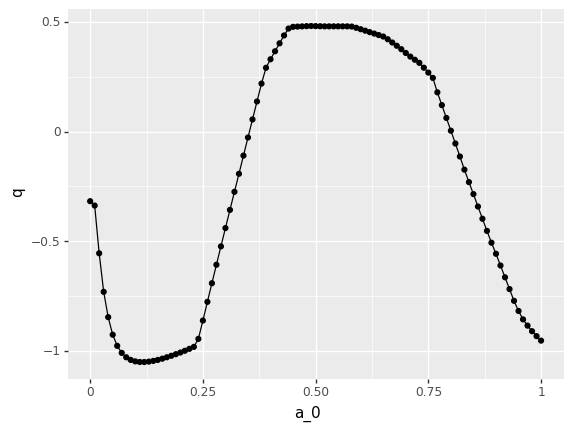

<ggplot: (8790540665955)>

        a_0  a_1       q_x   step       q_y         q
74526  0.89  0.3  2.708744  39999 -0.506138 -0.506138
74527  0.90  0.3  2.703542  39999 -0.556600 -0.556600
74528  0.91  0.3  2.701515  39999 -0.609956 -0.609956
74529  0.92  0.3  2.701240  39999 -0.663659 -0.663659
74530  0.93  0.3  2.699209  39999 -0.717295 -0.717295
74531  0.94  0.3  2.689449  39999 -0.770791 -0.770791
74532  0.95  0.3  2.681352  39999 -0.816931 -0.816931
74533  0.96  0.3  2.671121  39999 -0.855307 -0.855307
74534  0.97  0.3  2.660689  39999 -0.883736 -0.883736
74535  0.98  0.3  2.650072  39999 -0.909146 -0.909146
74536  0.99  0.3  2.639269  39999 -0.931666 -0.931666
74537  1.00  0.3  2.628166  39999 -0.952102 -0.952102


In [1413]:
for a_1_cut in [0.0, 0.1, 0.2, 0.3]:
    print(a_1_cut)
    q_slice = q_map[(q_map.a_1==a_1_cut) & (q_map['step']==step)]
    display(pn.ggplot(q_slice, pn.aes('a_0', 'q')) + pn.geom_point()  + pn.geom_line())
    print(q_slice.tail(12))

0.79


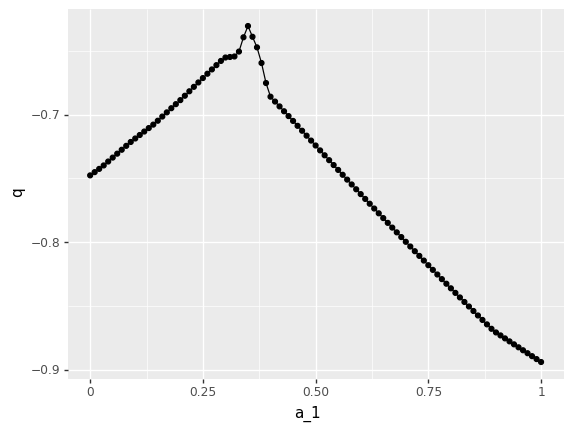

<ggplot: (8790540677794)>

0.8


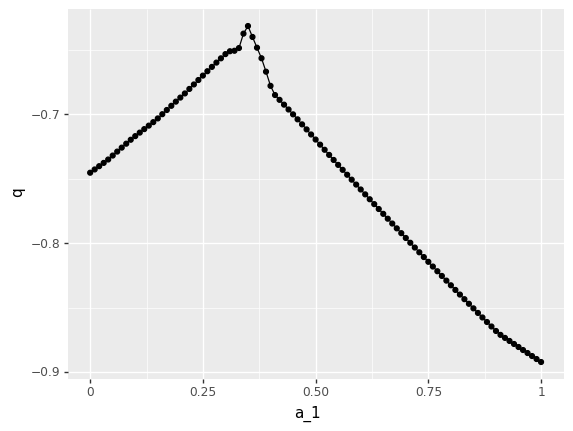

<ggplot: (-9223363246313956485)>

0.81


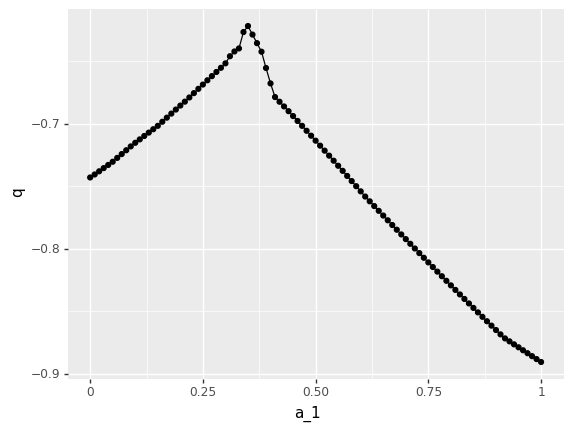

<ggplot: (8790524088335)>

In [1299]:
q_map = q_comb
for a_0_cut in [0.79, 0.8, 0.81]:
    print(a_0_cut)
    q_slice = q_map[(q_map.a_0==a_0_cut) & (q_map['step']==step)]
    display(pn.ggplot(q_slice, pn.aes('a_1', 'q')) + pn.geom_point()  + pn.geom_line())